In [1]:
import zipfile
import os
import os.path 
import nibabel as nib
import numpy as np
import pandas as pd
import shutil
import random
import re

In [ ]:
path1 = '/content/drive/MyDrive/3D Segmentation/data used/lim 128'

dpath = '/content/data used'

for i in os.listdir(path1):
  print(i)
  file = i.split('.zip')
  filename = file[0]
  zip_file=zipfile.ZipFile(path1 + '/' + i)
  zip_file.extractall(dpath + '/' + str(filename) + '/' )

lim 128.zip
ctscan 128.zip


In [ ]:
ct = []
lim = []

for i in os.listdir(dpath):
  a = dpath + '/' + i
  if os.path.isdir(a):
    for i in os.listdir(a):
      filepath = a + '/' + i
      if 'ctscan' in filepath:
        ct.append(filepath)
      elif 'lim' in filepath:
        lim.append(filepath)

In [2]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)


In [ ]:
ct = sorted_alphanumeric(ct)
lim = sorted_alphanumeric(lim)

In [ ]:
print(ct)
print(lim)

['/content/data used/ctscan 128/coronacases_001.nii.nii.gz', '/content/data used/ctscan 128/coronacases_002.nii.nii.gz', '/content/data used/ctscan 128/coronacases_003.nii.nii.gz', '/content/data used/ctscan 128/coronacases_004.nii.nii.gz', '/content/data used/ctscan 128/coronacases_005.nii.nii.gz', '/content/data used/ctscan 128/coronacases_006.nii.nii.gz', '/content/data used/ctscan 128/coronacases_007.nii.nii.gz', '/content/data used/ctscan 128/coronacases_008.nii.nii.gz', '/content/data used/ctscan 128/coronacases_009.nii.nii.gz', '/content/data used/ctscan 128/coronacases_010.nii.nii.gz', '/content/data used/ctscan 128/radiopaedia_4_85506_1.nii.nii.gz', '/content/data used/ctscan 128/radiopaedia_7_85703_0.nii.nii.gz', '/content/data used/ctscan 128/radiopaedia_10_85902_1.nii.nii.gz', '/content/data used/ctscan 128/radiopaedia_10_85902_3.nii.nii.gz', '/content/data used/ctscan 128/radiopaedia_14_85914_0.nii.nii.gz', '/content/data used/ctscan 128/radiopaedia_27_86410_0.nii.nii.gz',

In [ ]:
len(ct), len(lim)

(20, 20)

In [ ]:
data = pd.DataFrame({'CT File':ct, 'LIM':lim})

In [ ]:
data

,CT File,LIM
0,/content/data used/ctscan 128/coronacases_001....,/content/data used/lim 128/coronacases_001.nii...
1,/content/data used/ctscan 128/coronacases_002....,/content/data used/lim 128/coronacases_002.nii...
2,/content/data used/ctscan 128/coronacases_003....,/content/data used/lim 128/coronacases_003.nii...
3,/content/data used/ctscan 128/coronacases_004....,/content/data used/lim 128/coronacases_004.nii...
4,/content/data used/ctscan 128/coronacases_005....,/content/data used/lim 128/coronacases_005.nii...
5,/content/data used/ctscan 128/coronacases_006....,/content/data used/lim 128/coronacases_006.nii...
6,/content/data used/ctscan 128/coronacases_007....,/content/data used/lim 128/coronacases_007.nii...
7,/content/data used/ctscan 128/coronacases_008....,/content/data used/lim 128/coronacases_008.nii...
8,/content/data used/ctscan 128/coronacases_009....,/content/data used/lim 128/coronacases_009.nii...
9,/content/data used/ctscan 128/coronacases_010....,/content/data used/lim 128/coronacases_010.nii...


In [ ]:
randomn = random.randint(0, len(ct))

a = ct[randomn].split('/')
b = lim[randomn].split('/')

print(a[-1])
print(b[-1])

coronacases_001.nii.nii.gz
coronacases_001.nii.nii.gz


In [ ]:
path = os.chdir('/content/data used/ctscan 128')
filename = os.listdir(path)

for file in filename:
    new = "CT_{}.nii.gz".format(file[:-11])
    print("renaming: \n {}".format(file))
    print("\n into: \n {}\n".format(new))
    os.rename(file, new)



renaming: 
 radiopaedia_29_86490_1.nii.nii.gz

 into: 
 CT_radiopaedia_29_86490_1.nii.gz

renaming: 
 radiopaedia_29_86491_1.nii.nii.gz

 into: 
 CT_radiopaedia_29_86491_1.nii.gz

renaming: 
 coronacases_009.nii.nii.gz

 into: 
 CT_coronacases_009.nii.gz

renaming: 
 coronacases_006.nii.nii.gz

 into: 
 CT_coronacases_006.nii.gz

renaming: 
 coronacases_004.nii.nii.gz

 into: 
 CT_coronacases_004.nii.gz

renaming: 
 radiopaedia_10_85902_1.nii.nii.gz

 into: 
 CT_radiopaedia_10_85902_1.nii.gz

renaming: 
 coronacases_010.nii.nii.gz

 into: 
 CT_coronacases_010.nii.gz

renaming: 
 coronacases_007.nii.nii.gz

 into: 
 CT_coronacases_007.nii.gz

renaming: 
 radiopaedia_4_85506_1.nii.nii.gz

 into: 
 CT_radiopaedia_4_85506_1.nii.gz

renaming: 
 coronacases_001.nii.nii.gz

 into: 
 CT_coronacases_001.nii.gz

renaming: 
 coronacases_008.nii.nii.gz

 into: 
 CT_coronacases_008.nii.gz

renaming: 
 coronacases_005.nii.nii.gz

 into: 
 CT_coronacases_005.nii.gz

renaming: 
 radiopaedia_40_86625_0

In [ ]:
path = os.chdir('/content/data used/lim 128')
filename = os.listdir(path)

for file in filename:
    new = "LIM_{}.nii.gz".format(file[:-11])
    print("renaming: \n {}".format(file))
    print("\n into: \n {}\n".format(new))
    os.rename(file, new)



renaming: 
 radiopaedia_29_86490_1.nii.nii.gz

 into: 
 LIM_radiopaedia_29_86490_1.nii.gz

renaming: 
 radiopaedia_29_86491_1.nii.nii.gz

 into: 
 LIM_radiopaedia_29_86491_1.nii.gz

renaming: 
 coronacases_009.nii.nii.gz

 into: 
 LIM_coronacases_009.nii.gz

renaming: 
 coronacases_006.nii.nii.gz

 into: 
 LIM_coronacases_006.nii.gz

renaming: 
 coronacases_004.nii.nii.gz

 into: 
 LIM_coronacases_004.nii.gz

renaming: 
 radiopaedia_10_85902_1.nii.nii.gz

 into: 
 LIM_radiopaedia_10_85902_1.nii.gz

renaming: 
 coronacases_010.nii.nii.gz

 into: 
 LIM_coronacases_010.nii.gz

renaming: 
 coronacases_007.nii.nii.gz

 into: 
 LIM_coronacases_007.nii.gz

renaming: 
 radiopaedia_4_85506_1.nii.nii.gz

 into: 
 LIM_radiopaedia_4_85506_1.nii.gz

renaming: 
 coronacases_001.nii.nii.gz

 into: 
 LIM_coronacases_001.nii.gz

renaming: 
 coronacases_008.nii.nii.gz

 into: 
 LIM_coronacases_008.nii.gz

renaming: 
 coronacases_005.nii.nii.gz

 into: 
 LIM_coronacases_005.nii.gz

renaming: 
 radiopaedi

In [ ]:
for i in range(1,21):
  dir = str(i)
  os.makedirs('/content'+'/data tidied/'+dir)

In [ ]:
length = len(os.listdir('/content/data used/ctscan 128'))

path = '/content/data used'

element = -1
for i in range(1,length + 1): 

  element += 1

  for i in sorted_alphanumeric(os.listdir(path)):
    a = path + '/' + i
    print(a)
    
    
    if os.path.isdir(a):
      b = sorted_alphanumeric(os.listdir(a))
      print(element)
      print(b)
      r1 = b[element]

      source = a + '/' + r1
      target = '/content/data tidied/{}/{}'.format(element+1,r1)

      print(source)
      print(target)

      shutil.copy(source, target)
      print(element)
      

/content/data used/ctscan 128
0
['CT_coronacases_001.nii.gz', 'CT_coronacases_002.nii.gz', 'CT_coronacases_003.nii.gz', 'CT_coronacases_004.nii.gz', 'CT_coronacases_005.nii.gz', 'CT_coronacases_006.nii.gz', 'CT_coronacases_007.nii.gz', 'CT_coronacases_008.nii.gz', 'CT_coronacases_009.nii.gz', 'CT_coronacases_010.nii.gz', 'CT_radiopaedia_4_85506_1.nii.gz', 'CT_radiopaedia_7_85703_0.nii.gz', 'CT_radiopaedia_10_85902_1.nii.gz', 'CT_radiopaedia_10_85902_3.nii.gz', 'CT_radiopaedia_14_85914_0.nii.gz', 'CT_radiopaedia_27_86410_0.nii.gz', 'CT_radiopaedia_29_86490_1.nii.gz', 'CT_radiopaedia_29_86491_1.nii.gz', 'CT_radiopaedia_36_86526_0.nii.gz', 'CT_radiopaedia_40_86625_0.nii.gz']
/content/data used/ctscan 128/CT_coronacases_001.nii.gz
/content/data tidied/1/CT_coronacases_001.nii.gz
0
/content/data used/lim 128
0
['LIM_coronacases_001.nii.gz', 'LIM_coronacases_002.nii.gz', 'LIM_coronacases_003.nii.gz', 'LIM_coronacases_004.nii.gz', 'LIM_coronacases_005.nii.gz', 'LIM_coronacases_006.nii.gz', 'L

In [3]:
import nibabel as nib
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import glob
import tifffile as tiff
from tifffile import imsave
from PIL import Image
import tensorflow as tf
import cv2 as cv
from PIL import Image
import random

In [4]:
def applyClahe(img):
    clahe = cv.createCLAHE(clipLimit=3.0)
    claheImage = clahe.apply(np.uint8(img*255))
    return claheImage

In [ ]:
ctimg_sample = nib.load("/content/data tidied/1/CT_coronacases_001.nii.gz").get_fdata()
print('Before Scaling')
print('shape of the image : {}'.format(np.shape(ctimg_sample)))
print('maximum pixel value: {}'.format(ctimg_sample.max()))
print('minimum pixel value: {}'.format(ctimg_sample.min()))

#scaling
scaler = MinMaxScaler()
ctimg_sample2 = scaler.fit_transform(ctimg_sample.reshape(-1, ctimg_sample.shape[-1]))
ctimg_sample2 = applyClahe(ctimg_sample2)
ctimg_sample = scaler.fit_transform(ctimg_sample2.reshape(-1, ctimg_sample2.shape[-1])).reshape(ctimg_sample.shape)
ctimg_sample = ctimg_sample[:,:,:,0]
ctimg_sample = np.stack((ctimg_sample,)*3, axis = -1)

print('\nAfter Scaling')
print('shape of the image : {}'.format(np.shape(ctimg_sample)))
print('maximum pixel value: {}'.format(ctimg_sample.max()))
print('minimum pixel value: {}'.format(ctimg_sample.min()))


Before Scaling
shape of the image : (128, 128, 128, 1)
maximum pixel value: 1358.0
minimum pixel value: -1018.0

After Scaling
shape of the image : (128, 128, 128, 3)
maximum pixel value: 1.0
minimum pixel value: 0.0


In [ ]:
lim_sample = nib.load("/content/data tidied/1/LIM_coronacases_001.nii.gz").get_fdata()

print('original mask value : {}'.format(np.unique(lim_sample))) #ini value nya floating number

#ganti ke int8
lim_sample = lim_sample.astype(np.uint8)
print('converted mask value: {}'.format(np.unique(lim_sample)))

#satukan lungs dan infeksi jadi 3
lim_sample[lim_sample==2] = 1
lim_sample[lim_sample==3] = 2 
print('merged mask value: {}'.format(np.unique(lim_sample)))

#to categorical
lim_sample = to_categorical(lim_sample, num_classes = 3)
print('shape of the image  : {}'.format(np.shape(lim_sample)))

original mask value : [0. 1. 2. 3.]
converted mask value: [0 1 2 3]
merged mask value: [0 1 2]
shape of the image  : (128, 128, 128, 3)


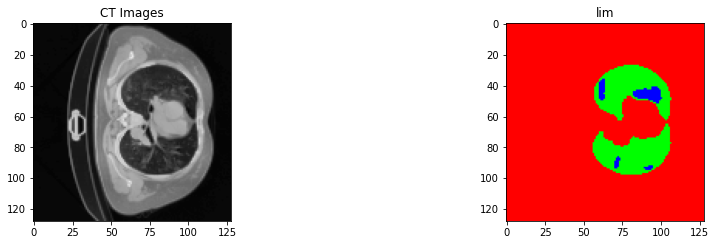

In [ ]:
sample_slice = random.randint(0, ctimg_sample.shape[2])

plt.figure(figsize=(24, 8))

plt.subplot(231)
plt.imshow(ctimg_sample[:,:,sample_slice], cmap='bone')
plt.title('CT Images')
plt.subplot(232)
plt.imshow(lim_sample[:,:,sample_slice])
plt.title('lim')
plt.show()

In [ ]:
ct_list = glob.glob('/content/data tidied/*/CT*')
lim_list = glob.glob('/content/data tidied/*/LIM*')

ct_list = sorted_alphanumeric(ct_list)
lim_list = sorted_alphanumeric(lim_list)

print(len((ct_list)),len((inf_list)))

20 20


In [ ]:
os.makedirs('/content/inf ready/ctscan')
os.makedirs('/content/inf ready/lim')

In [ ]:
for i in range(len(ct_list)):
  print('prep ct image and lim mask image number: ', i)

  scaler = MinMaxScaler()
  ct_img = nib.load(ct_list[i]).get_fdata()

  scaler = MinMaxScaler()
  ct_img2 = scaler.fit_transform(ct_img.reshape(-1, ct_img.shape[-1]))
  ct_img2 = applyClahe(ct_img2)
  ct_img = scaler.fit_transform(ct_img2.reshape(-1, ct_img2.shape[-1])).reshape(ct_img.shape)
  ct_img = ct_img[:,:,:,0]
  ct_img = np.stack((ct_img,)*3, axis = -1)


  lim_img = nib.load(lim_list[i]).get_fdata()
  lim_img = lim_img.astype(np.uint8)
  lim_img[lim_img==2] = 1
  lim_img[lim_img==3] = 2 
  lim_img = to_categorical(lim_img, num_classes = 3)

  np.save('/content/inf ready/ctscan/ctscan_'+str(i)+'.npy',ct_img)
  np.save('/content/inf ready/lim/lim_'+str(i)+'.npy',lim_img)


prep ct image and lim mask image number:  0
prep ct image and lim mask image number:  1
prep ct image and lim mask image number:  2
prep ct image and lim mask image number:  3
prep ct image and lim mask image number:  4
prep ct image and lim mask image number:  5
prep ct image and lim mask image number:  6
prep ct image and lim mask image number:  7
prep ct image and lim mask image number:  8
prep ct image and lim mask image number:  9
prep ct image and lim mask image number:  10
prep ct image and lim mask image number:  11
prep ct image and lim mask image number:  12
prep ct image and lim mask image number:  13
prep ct image and lim mask image number:  14
prep ct image and lim mask image number:  15
prep ct image and lim mask image number:  16
prep ct image and lim mask image number:  17
prep ct image and lim mask image number:  18
prep ct image and lim mask image number:  19


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_file = '/content/inf ready/'
output_file = '/content/drive/MyDrive/3D Segmentation/splitted 75 lim 128 data/'

In [ ]:
splitfolders.ratio(input_file, output=output_file, seed=38, ratio=(.75, .25), group_prefix=None)

Copying files: 40 files [00:06,  5.73 files/s]


In [5]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanIoU
from keras.preprocessing.image import ImageDataGenerator

In [6]:
pip install segmentation-models-3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 


In [7]:
import segmentation_models_3D as sm
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

Segmentation Models: using `tf.keras` framework.


In [ ]:
kernel_initializer =  'he_uniform'

In [8]:
BACKBONE = 'vgg19'


In [13]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import random
import tifffile as tiff
from tifffile import imread

def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name).astype(np.float32)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

  
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):
  
  length = len(img_list)

  while True:
    batch_start = 0
    batch_end = batch_size

    while batch_start < length:
      limit = min(batch_end, length)
      X = load_img(img_dir, img_list[batch_start:limit])
      Y = load_img(mask_dir, mask_list[batch_start:limit])

      yield(X, Y)

      batch_start += batch_size
      batch_end += batch_size


In [14]:
import os
import numpy as np
import keras
import tifffile as tiff
from tifffile import imread
import matplotlib.pyplot as plt
import glob
import random

In [15]:
train_img_dir = "/content/drive/MyDrive/3D Segmentation/splitted 75 lim 128 data/train/ctscan/"
train_mask_dir = "/content/drive/MyDrive/3D Segmentation/splitted 75 lim 128 data/train/lim/"

val_img_dir = "/content/drive/MyDrive/3D Segmentation/splitted 75 lim 128 data/val/ctscan/"
val_mask_dir = "/content/drive/MyDrive/3D Segmentation/splitted 75 lim 128 data/val/lim/"

train_img_list= sorted_alphanumeric(os.listdir(train_img_dir))
train_mask_list = sorted_alphanumeric(os.listdir(train_mask_dir))

val_img_list= sorted_alphanumeric(os.listdir(val_img_dir))
val_mask_list = sorted_alphanumeric(os.listdir(val_mask_dir))

In [16]:
batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)


val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

In [17]:
img, msk = train_img_datagen.__next__()

In [ ]:
print(img.shape)
print(msk.shape)

(1, 128, 128, 128, 3)
(1, 128, 128, 128, 3)


82


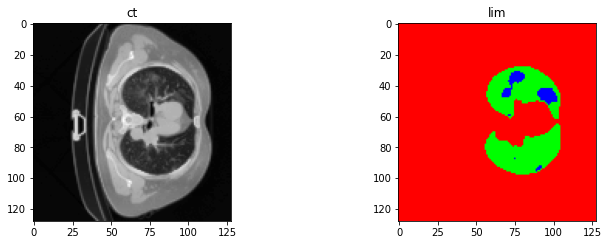

In [18]:
img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]

n_slice=  random.randint(0, test_mask.shape[2])
print(n_slice) #70
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice,0], cmap='gray')
plt.title('ct')
plt.subplot(222)
plt.imshow(test_mask[:,:,n_slice])
plt.title('lim')
plt.show()

In [19]:
dice_loss = sm.losses.DiceLoss() 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(), sm.losses.DiceLoss(), sm.losses.CategoricalFocalLoss(), sm.losses.JaccardLoss()]
LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)
callbacks = [EarlyStopping(monitor='val_loss', patience=250, verbose=1)]

In [20]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [21]:
model = sm.Unet(
                BACKBONE, 
                encoder_weights=None,
                classes = 3,
                activation = 'softmax',
                input_shape = (128,128,128,3))

In [22]:
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)

In [23]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=10000,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          callbacks = callbacks
          )

Epoch 1/10000
15/15 [==============================] - 53s 2s/step - loss: 0.7394 - iou_score: 0.1862 - f1-score: 0.3021 - dice_loss: 0.6979 - focal_loss: 0.0415 - jaccard_loss: 0.8009 - val_loss: 1.4069 - val_iou_score: 0.0376 - val_f1-score: 0.1060 - val_dice_loss: 0.8940 - val_focal_loss: 0.5128 - val_jaccard_loss: 0.9417
Epoch 2/10000
15/15 [==============================] - 24s 2s/step - loss: 0.6391 - iou_score: 0.3723 - f1-score: 0.3831 - dice_loss: 0.6169 - focal_loss: 0.0222 - jaccard_loss: 0.7239 - val_loss: 1.9976 - val_iou_score: 0.0360 - val_f1-score: 0.0698 - val_dice_loss: 0.9302 - val_focal_loss: 1.0674 - val_jaccard_loss: 0.9616
Epoch 3/10000
15/15 [==============================] - 24s 2s/step - loss: 0.5688 - iou_score: 0.4685 - f1-score: 0.4449 - dice_loss: 0.5551 - focal_loss: 0.0137 - jaccard_loss: 0.6589 - val_loss: 1.5428 - val_iou_score: 0.0439 - val_f1-score: 0.1126 - val_dice_loss: 0.8874 - val_focal_loss: 0.6554 - val_jaccard_loss: 0.9378
Epoch 4/10000
15/15

In [24]:
a =history.history['loss']
print(len(a))
#epoch

396


In [25]:
model.save('/content/drive/MyDrive/3D Segmentation/vgg19unetlim75_notf.h5')

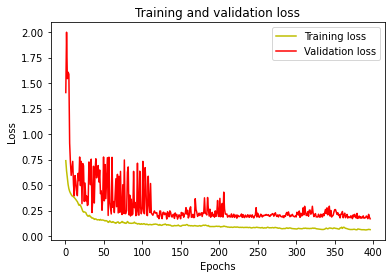

In [26]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

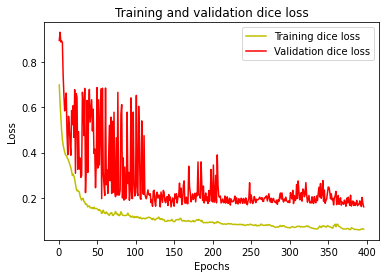

In [27]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['dice_loss']
val_loss = history.history['val_dice_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training dice loss')
plt.plot(epochs, val_loss, 'r', label='Validation dice loss')
plt.title('Training and validation dice loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

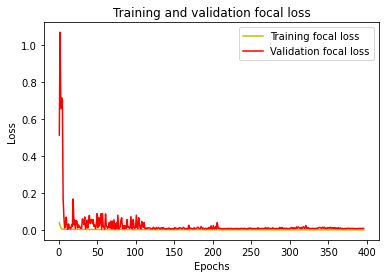

In [28]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['focal_loss']
val_loss = history.history['val_focal_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training focal loss')
plt.plot(epochs, val_loss, 'r', label='Validation focal loss')
plt.title('Training and validation focal loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

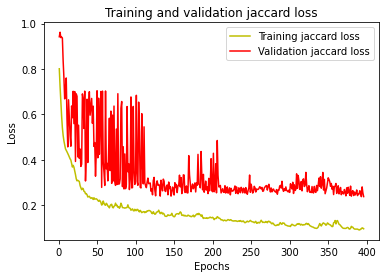

In [29]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['jaccard_loss']
val_loss = history.history['val_jaccard_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training jaccard loss')
plt.plot(epochs, val_loss, 'r', label='Validation jaccard loss')
plt.title('Training and validation jaccard loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

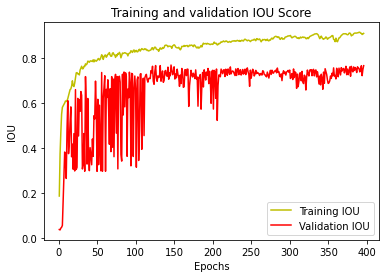

In [30]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']
plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU Score')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

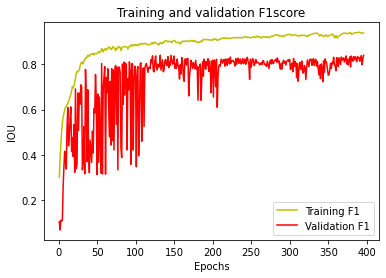

In [31]:
acc = history.history['f1-score']
val_acc = history.history['val_f1-score']
plt.plot(epochs, acc, 'y', label='Training F1')
plt.plot(epochs, val_acc, 'r', label='Validation F1')
plt.title('Training and validation F1score')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [32]:
imgtest, msktest = val_img_datagen.__next__()

In [34]:
model.evaluate(imgtest,msktest)

1/1 [==============================] - 0s 416ms/step - loss: 0.1248 - iou_score: 0.8146 - f1-score: 0.8780 - dice_loss: 0.1220 - focal_loss: 0.0027 - jaccard_loss: 0.1883


[0.12476589530706406,
 0.8145598769187927,
 0.8779745101928711,
 0.1220254898071289,
 0.00274040549993515,
 0.18825292587280273]